In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from tqdm import tqdm
import glob
import os
import json
import pickle
from einops import rearrange 

In [3]:
#import subject names and data
sub_names = []
sub_dict_data = []
mat_files = glob.glob('Preprocessed_data/*.mat')
for i, file in enumerate(mat_files):
    if i<3:
        sub_names.append(file.split('.')[0].split('\\')[1])
        sub_dict_data.append(scipy.io.loadmat(file))
print(sub_names)

['P09', 'P10', 'P11']


In [52]:
P8_labels = []
labels = []
with open('C:/Users/saeed/Desktop/Master/KARA ONE Data/MM08/kinect_data/labels.txt') as f:
    lines = f.readlines()
print(len(lines))
for line in lines:
    line = line.split('\n')[0]
    if line == '/iy/' or line == 'iy':
        labels.append(0)
    elif line == '/uw/' or line == 'uw':
        labels.append(1)
    elif line == '/piy/' or line == 'piy':
        labels.append(2)
    elif line == '/tiy/' or line == 'tiy':
        labels.append(3)
    elif line == '/diy/' or line == 'diy':
        labels.append(4)
    elif line == '/m/' or line == 'm':
        labels.append(5)
    elif line == '/n/' or line == 'n':
        labels.append(6)
    elif line == '/pat/' or line == 'pat':
        labels.append(7)
    elif line == '/pot/' or line == 'pot':
        labels.append(8)
    elif line == '/knew/' or line == 'knew':
        labels.append(9)
    elif line == '/gnaw/' or line == 'gnaw':
        labels.append(10)
P8_labels = labels
print(P8_labels)   

131
[6, 5, 2, 1, 4, 6, 1, 2, 5, 3, 2, 6, 3, 1, 6, 2, 5, 1, 3, 0, 0, 6, 2, 3, 5, 4, 2, 0, 5, 4, 2, 5, 1, 3, 6, 4, 1, 4, 5, 1, 5, 0, 0, 5, 6, 1, 1, 6, 2, 2, 3, 3, 0, 6, 3, 2, 1, 3, 4, 3, 4, 4, 2, 3, 5, 0, 4, 1, 6, 0, 5, 4, 4, 0, 6, 2, 6, 5, 0, 0, 4, 1, 3, 9, 10, 8, 7, 8, 9, 7, 10, 7, 9, 9, 7, 7, 8, 10, 8, 10, 10, 10, 10, 7, 8, 7, 10, 8, 7, 8, 9, 9, 7, 7, 8, 9, 10, 9, 8, 7, 7, 9, 9, 9, 10, 10, 9, 8, 10, 8, 8]


In [53]:
labels = [P9_labels, P10_labels, P11_labels, P12_labels, P14_labels, P15_labels, P16_labels, P18_labels, P19_labels,
         P2_labels, P20_labels, P21_labels, P5_labels, P8_labels]

In [54]:
print(labels[1])

[5, 0, 5, 6, 3, 1, 5, 3, 5, 5, 3, 6, 0, 4, 3, 4, 3, 6, 5, 4, 5, 3, 2, 6, 1, 0, 6, 4, 2, 3, 0, 0, 5, 2, 4, 2, 1, 0, 3, 6, 2, 0, 0, 4, 2, 1, 4, 2, 3, 6, 0, 3, 1, 5, 0, 3, 2, 4, 1, 0, 3, 0, 2, 1, 5, 2, 2, 4, 1, 4, 5, 5, 1, 1, 6, 1, 4, 4, 6, 1, 6, 6, 6, 2, 7, 8, 10, 7, 10, 10, 8, 8, 9, 10, 8, 7, 7, 9, 10, 9, 9, 8, 7, 8, 7, 9, 10, 9, 9, 8, 8, 8, 10, 7, 9, 7, 7, 7, 10, 8, 9, 8, 10, 10, 10, 10, 7, 9, 9, 7, 8, 9]


In [53]:
with open("labels.pkl", "wb") as f:
    pickle.dump(labels, f)

In [4]:
#extract numpy data from dict data
sub_data = []
for dict_data, name in zip(sub_dict_data, sub_names):
    if name == 'P2':
        sub_data.append(dict_data['P2'])
    else:
        sub_data.append(dict_data['A'])

In [5]:
#printing number of subjects, all data shapes and number of all trials
print('number of subjects = ', len(sub_data))
print('data shapes:')
count = 0
for data in sub_data:
    count += data.shape[2]
    print(data.shape)
print('number of all trials = ', count)    

number of subjects =  3
data shapes:
(62, 1250, 132)
(62, 1250, 132)
(62, 1250, 132)
number of all trials =  396


In [6]:
for data in sub_data:
    print(data.shape)

(62, 1250, 132)
(62, 1250, 132)
(62, 1250, 132)


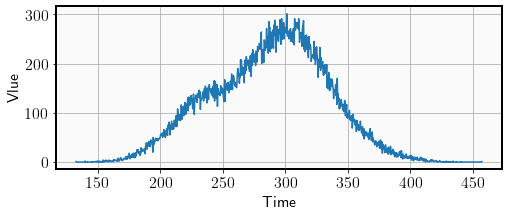

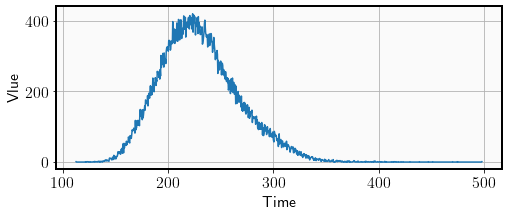

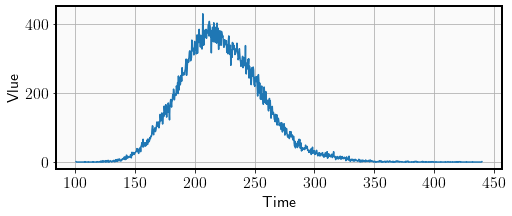

In [20]:
for i,data in enumerate(sub_mfc):
    hist_data = rearrange(data, 'n c m t -> m (n c t)')
    plt.figure(figsize=(8, 3))
    hist = np.histogram(hist_data[0], bins=1000)
    ax = plt.gca()
    ax.set_facecolor((0.98,0.98,0.98))
    plt.grid()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Vlue', fontsize=16)
    plt.plot(hist[1][1:],hist[0])
    plt.savefig('p'+str(i)+'.png', dpi=300)

In [7]:
#reshaping the data to (trial, channel, sample) 
n_mfcc = 20
framesize = 1 * 250
hop_size = int(framesize/2)

sub_mfc = []

for i, data in enumerate(sub_data):
    data = rearrange(data, 'c s t -> t c s')
    trials = []
    for j, trial in enumerate(tqdm(data)):
        channels = []
        for k, channel in enumerate(trial):
            mfccs = librosa.feature.mfcc(y=channel, n_mfcc=n_mfcc, n_fft=framesize, hop_length=hop_size, sr=250)
            channels.append(np.array(mfccs))
        trials.append(np.array(channels)) 
    data = np.array(trials)
    print(data.shape)
    sub_mfc.append(data)
    Max = np.max(data, axis=(0,1,3), keepdims=True)
    Min = np.min(data, axis=(0,1,3), keepdims=True)
    data = (data-Min)/(Max-Min)
    if i == 0:
        all_data = data
    else:
        all_data = np.vstack((all_data, data))
print(all_data.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:37<00:00,  3.48it/s]


(132, 62, 20, 11)


100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:39<00:00,  3.33it/s]


(132, 62, 20, 11)


100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:39<00:00,  3.36it/s]

(132, 62, 20, 11)
(396, 62, 20, 11)


In [24]:
with open('normal_all_data.pkl', 'wb') as f:
    pickle.dump(all_data, f)

In [6]:
#set parameters for MFCC extraction
n_mfcc = 20
framesize = 1 * 250
hop_size = int(framesize/2)

In [45]:
#calculate MFCCs and put them in a matrix with shape (#trial, #channels) for each sub. put all new subs in MFCC_data 
MFCC_data = []
for sub in tqdm(reshaped_data):
    trials = []
    for i, trial in enumerate(sub):
        channels = []
        for j, channel in enumerate(trial):
            mfccs = librosa.feature.mfcc(y=channel, n_mfcc=n_mfcc, n_fft=framesize, hop_length=hop_size, sr=250)
            channels.append(np.array(mfccs))
        trials.append(np.array(channels))
    MFCC_data.append(np.array(trials))        

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [05:12<00:00, 22.29s/it]


In [51]:
with open("MFCCs.pkl", "wb") as f:
    pickle.dump(MFCC_data, f)

In [4]:
with open("MFCCs.pkl", "rb") as f:
    mfccs = pickle.load(f)

In [56]:
mfccs[0].shape

(132, 62, 20, 11)

In [77]:
all_labels = []
for P_label in labels:
    for label in P_label:
        all_labels.append(label)

In [79]:
with open("all_labels.pkl", "wb") as f:
    pickle.dump(all_labels, f)

In [81]:
for i, mfcc in enumerate(mfccs):
    if i==0:
        all_mfccs = mfcc
    else:
        all_mfccs = np.vstack((all_mfccs, mfcc))

In [82]:
all_mfccs.shape

(1913, 62, 20, 11)

In [83]:
with open("all_data.pkl", "wb") as f:
    pickle.dump(all_mfccs, f)

In [74]:
a = np.random.randint(0, 20, size=(2,3,4,5))
b = np.random.randint(0, 20, size=(3,3,4,5))
c = np.random.randint(0, 20, size=(4,3,4,5))

In [56]:
with open('all_label.pkl', 'wb') as f:
    pickle.dump(all_label, f)

In [55]:
all_label = [label for p in labels for label in p]
len(all_label)

1913

In [ ]:
with open("all_label.pkl", "rb") as f:
    labels = pickle.load(f)
vowel_labels, nasal_labels, bilabial_labels, iy_labels, uw_labels = [], [], [], [], [] 
for label in labels:
    if label==0:
        vowel_labels.append(0)
        nasal_labels.append(0)
        bilabial_labels.append(0)
        iy_labels.append(1)
        uw_labels.append(0)
    elif label==1:
        vowel_labels.append(0)
        nasal_labels.append(0)
        bilabial_labels.append(0)
        iy_labels.append(0)
        uw_labels.append(1)
    elif label==2:
        vowel_labels.append(1)
        nasal_labels.append(0)
        bilabial_labels.append(1)
        iy_labels.append(1)
        uw_labels.append(0)
    elif label==3:
        vowel_labels.append(1)
        nasal_labels.append(0)
        bilabial_labels.append(0)
        iy_labels.append(1)
        uw_labels.append(0)
    elif label==4:
        vowel_labels.append(1)
        nasal_labels.append(0)
        bilabial_labels.append(0)
        iy_labels.append(1)
        uw_labels.append(0)
    elif label==5:
        vowel_labels.append(1)
        nasal_labels.append(1)
        bilabial_labels.append(1)
        iy_labels.append(0)
        uw_labels.append(0)
    elif label==6:
        vowel_labels.append(1)
        nasal_labels.append(1)
        bilabial_labels.append(0)
        iy_labels.append(0)
        uw_labels.append(0)
    elif label==7:
        vowel_labels.append(1)
        nasal_labels.append(0)
        bilabial_labels.append(1)
        iy_labels.append(0)
        uw_labels.append(0)
    elif label==8:
        vowel_labels.append(1)
        nasal_labels.append(0)
        bilabial_labels.append(1)
        iy_labels.append(0)
        uw_labels.append(0)
    elif label==9:
        vowel_labels.append(1)
        nasal_labels.append(1)
        bilabial_labels.append(0)
        iy_labels.append(0)
        uw_labels.append(0)
    elif label==10:
        vowel_labels.append(1)
        nasal_labels.append(1)
        bilabial_labels.append(0)
        iy_labels.append(0)
        uw_labels.append(0)
        
with open('vowel_label.pkl', 'wb') as f:
    pickle.dump(vowel_labels, f)
with open('bilab_label.pkl', 'wb') as f:
    pickle.dump(bilabi_labels, f)
with open('nasal_label.pkl', 'wb') as f:
    pickle.dump(vowel_labels, f)
with open('iy_label.pkl', 'wb') as f:
    pickle.dump(vowel_labels, f)
with open('uw_label.pkl', 'wb') as f:
    pickle.dump(vowel_labels, f)

In [ ]:
#train-test split for tasks
X_vowel_train, X_vowel_test, y_vowel_train, y_vowel_test = train_test_split(all_data, vowel_labels,  
                                                                            stratify=vowel_labels,
                                                                            test_size=0.1)
X_nasal_train, X_nasal_test, y_nasal_train, y_nasal_test = train_test_split(all_data, nasal_labels, 
                                                                            stratify=nasal_labels, 
                                                                            test_size=0.1)
X_bilabial_train, X_bilabial_test, y_bilabial_train, y_bilabial_test = train_test_split(all_data, bilabial_labels, 
                                                                            stratify=bilabial_labels, 
                                                                            test_size=0.1)
X_iy_train, X_iy_test, y_iy_train, y_iy_test = train_test_split(all_data, iy_labels, 
                                                                            stratify=iy_labels, 
                                                                            test_size=0.1)
X_uw_train, X_uw_test, y_uw_train, y_uw_test = train_test_split(all_data, uw_labels, 
                                                                            stratify=uw_labels, 
                                                                            test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, 
                                                    stratify=all_labels, 
                                                    test_size=0.1)

In [ ]:
with open("data/uw/X_uw_train.pkl", "wb") as f:
    pickle.dump(X_uw_train, f)
with open("data/uw/X_uw_test.pkl", "wb") as f:
    pickle.dump(X_uw_test, f)
with open("data/uw/y_uw_train.pkl", "wb") as f:
    pickle.dump(y_uw_train, f)
with open("data/uw/y_uw_test.pkl", "wb") as f:
    pickle.dump(y_uw_test, f)